In [29]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [30]:
tide_data = np.genfromtxt('ASTR19_F25_group_project_data.txt', 
                  dtype = None, encoding = 'utf-8')

# x = np.linspace(0, 72, 200)
# a, b = 2.2, 1.0
# T1 = 12
# T2 = 24

# y = a * np.sin(2*np.pi * x /T1) + b * np.sin(2*np.pi * x /T2)
# print(y)
# print(x)

# init = x[0][0]
# print(init)

times = []
for time in tide_data:
    times.append(time[1])

print(times)
    # for entry in tuple:
    #     print(entry[1])


time_of_day_hours = []
for time_string in times:
    h_string, m_string = time_string.split(':')
    h = int(h_string)
    m = int(m_string)
    t_hours = h + m/60
    time_of_day_hours.append(t_hours)
print(time_of_day_hours)


days = []
for i in tide_data:
    days.append(i[0])

# print(days)

day_0 = days[0]

total_hours = []
for day, t_hours in zip(days, time_of_day_hours):
    hrs = 24 * (day - day_0) + t_hours
    total_hours.append(hrs)

print(total_hours)

['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29', '12:22', '5:21', '13:14']
[8.116666666666667, 15.616666666666667, 8.916666666666666, 16.416666666666668, 9.75, 17.233333333333334, 10.583333333333334, 18.0, 11.466666666666667, 18.766666666666666, 12.366666666666667, 19.516666666666666, 13.4, 20.266666666666666, 3.3666666666666667, 21.016666666666666, 4.1166666666666

In [31]:
x = np.array(total_hours)


heights = []
for row in tide_data:
    heights.append(row[2])

y = np.array(heights)
print(y)

[ 6.57 -0.39  5.38 -1.74  5.26 -1.36  4.13 -1.15  3.48 -1.61  2.62  0.05
  1.83  1.01  3.57  0.73  4.54  2.17  3.76  2.88  3.9   1.92  4.73  1.74
  5.66  0.79  5.33 -0.04  5.23 -1.12  6.67 -0.61  4.74 -0.93  4.69 -1.29
  4.2   0.22  3.68  0.26  2.47  0.36  2.59  0.99  4.1   1.87  3.17  1.6
  3.71  3.1   4.04  2.49  4.07  2.18  5.93  0.7   6.89  0.21  6.72  0.22
  6.77 -1.68  5.77 -1.32  4.35 -0.73  4.23 -0.38  2.24 -0.61  3.45 -0.46
  4.13  1.21  3.34  2.58  3.32  3.26  5.21  2.39  4.83  2.41]


In [32]:
def tide_model(x, a, b, phi_1, phi_2, c):
    return a * np.sin(2*np.pi * x/12 + phi_1) + b * np.sin(2*np.pi * x/24 + phi_2) + c
    

In [33]:
params, params_cov = optimize.curve_fit(tide_model, x, y, sigma = 0.25)
print(params)

a_fit = params[0]
b_fit = params[1]
phi_1_fit = params[2]
phi_2_fit = params[3]
c_fit = params[4]

y_fit = a_fit * np.sin(2*np.pi * x/12 + phi_1_fit) + b_fit * np.sin(2*np.pi * x/24 + phi_2_fit) + c_fit
# y_fit = a_fit * np.sin(2*np.pi * x/T1) + b_fit * np.sin(2*np.pi * x/T2)
residuals = y - y_fit 
# print(residuals)

[9.24282852e-01 2.83056094e+00 9.08784623e+00 3.40032409e-03
 2.58037166e+00]


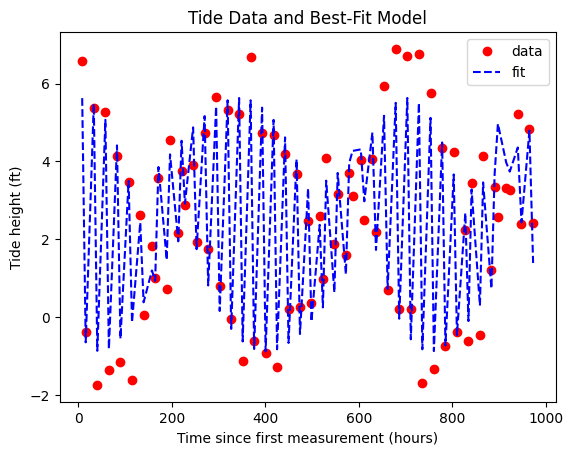

In [34]:
plt.plot(x, y, 'o', color = 'red', label = 'data')
plt.plot(x, y_fit, '--', color = 'blue', label = 'fit')
plt.xlabel('Time since first measurement (hours)')
plt.ylabel('Tide height (ft)')
plt.title('Tide Data and Best-Fit Model')
plt.legend()
plt.savefig('tide_data_fit.pdf', bbox_inches='tight', dpi=300)



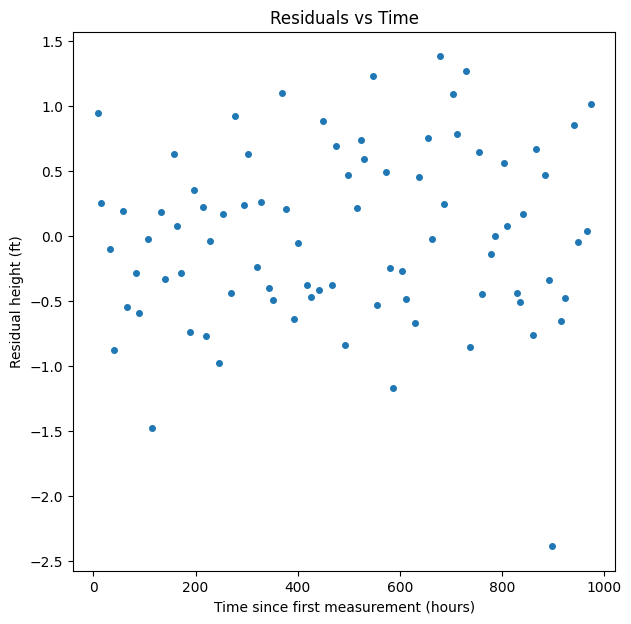

In [35]:
plt.figure(figsize=(7,7))
plt.plot(x, residuals, 'o', markersize = 4)
plt.xlabel('Time since first measurement (hours)')
plt.ylabel('Residual height (ft)')
plt.title('Residuals vs Time')
plt.savefig('residuals.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [36]:
sigma = 0.25

res_std = np.std(residuals, ddof=1)
print("Std dev of residuals:", res_std)
print("Assumed measurement error (ft):", sigma)

Std dev of residuals: 0.6775969609923415
Assumed measurement error (ft): 0.25


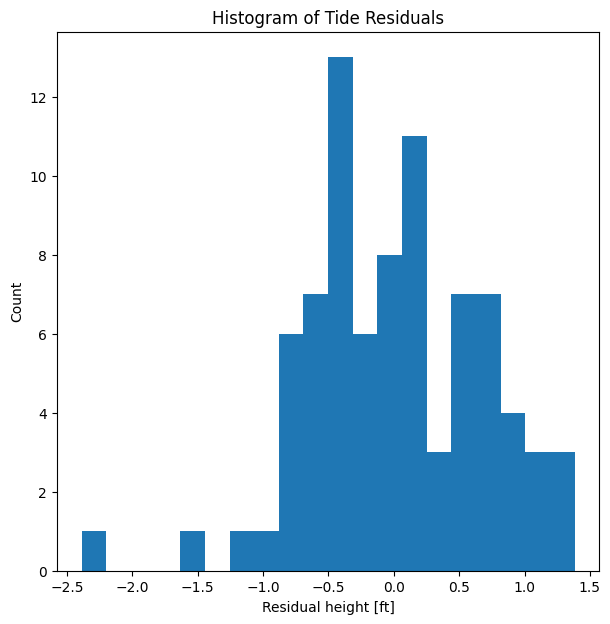

In [37]:
plt.figure(figsize = (7,7))

plt.xlabel('Residual height [ft]')   # (data - model)
plt.ylabel('Count')
plt.title('Histogram of Tide Residuals')

plt.hist(residuals, bins = 20)

plt.savefig('tide_histogram', bbox_inches = 'tight', dpi = 300)
plt.show()

In [38]:
tsunami_residual = 2.0

N_sigma = tsunami_residual / res_std

print('Tsunami deviation:', N_sigma)

Tsunami deviation: 2.951607098519152


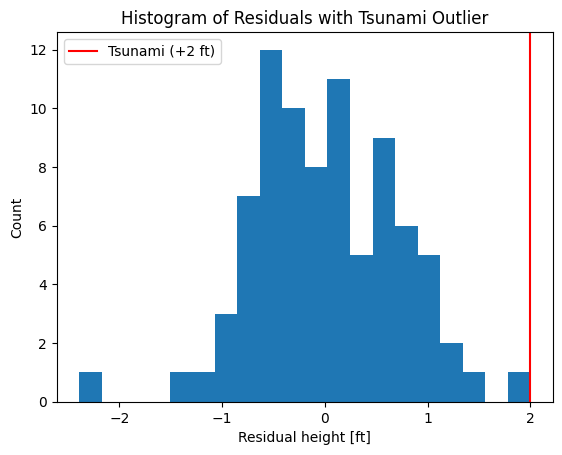

In [39]:
residuals_list = list(residuals)
residuals_list.append(2.0)
residuals_with_tsunami = np.array(residuals_list)

# residuals_with_tsunami = np.append(residuals, tsunami_residual)

plt.figure()

plt.hist(residuals_with_tsunami, bins=20)

plt.xlabel("Residual height [ft]")
plt.ylabel("Count")
plt.title("Histogram of Residuals with Tsunami Outlier")

plt.axvline(tsunami_residual, color='red', linestyle='-', label='Tsunami (+2 ft)')
plt.legend()

plt.savefig("residual_hist_with_tsunami.pdf", bbox_inches='tight', dpi=300)
plt.show()

